In [7]:
%matplotlib widget
import sys
import os
import pwd
user = pwd.getpwuid(os.getuid())[0]
sys.path.append(rf"/home/{user}/Flash2OpenPMD/src")
import yt
import numpy as np
from yt import derived_field
from flash2openpmd import Convert

In [8]:
run_directory = rf'../Data/'
filename = "slab_hdf5_plt_cnt_0047"
ts = Convert(run_directory,filename)

In [9]:
# print(ts.read4Flash.__doc__)

In [10]:
density = ts.get_data(fields="El_number_density", level=5, dtype='float32')
n_max = np.max(density)
print("Array dimension for density, [y,x] : ", density.shape)
print(f"Maximum density [cm**-3] = {n_max:0.2e}")
print("Density data type is", density.dtype)
# n_e_min/n_e_max

density = density/n_max

condition = density <= 1e-4

density[condition] = 0

yt : [INFO     ] 2025-12-10 15:09:50,243 Parameters: current_time              = 2.3580929548436026e-10
yt : [INFO     ] 2025-12-10 15:09:50,244 Parameters: domain_dimensions         = [16 16  1]
yt : [INFO     ] 2025-12-10 15:09:50,245 Parameters: domain_left_edge          = [-0.0015  0.      0.    ]
yt : [INFO     ] 2025-12-10 15:09:50,246 Parameters: domain_right_edge         = [0.0015 0.002  1.    ]
yt : [INFO     ] 2025-12-10 15:09:50,247 Parameters: cosmological_simulation   = 0


Data geometry: cartesian
Data dimensionality: 2D
Array dimension for density, [y,x] :  (512, 512)
Maximum density [cm**-3] = 4.25e+20
Density data type is float32


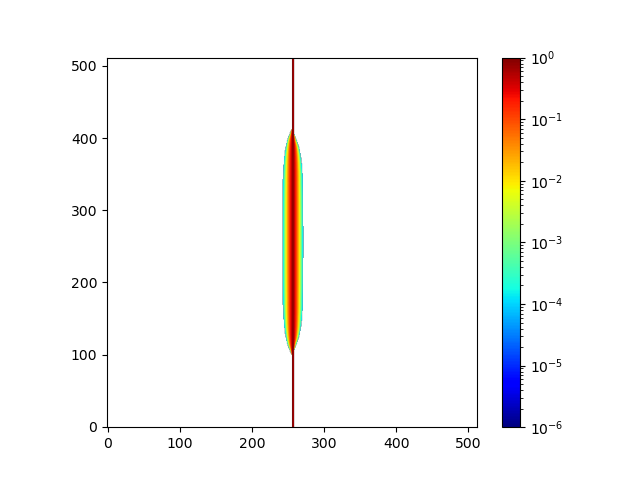

In [11]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots()

img_P = ax.imshow(
        density[:,:],
        origin='lower',
        norm=LogNorm(vmin=1e-6),
        cmap='jet',
        aspect='equal'
    )
cbar_fields = plt.colorbar(
        img_P, 
        orientation="vertical",
        ticklocation="right",
    )

In [12]:
# ts.write2openpmd(density,species='e',output_name=f"flash2openpmd_0")